## Project description

The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.

One of the most common problems gyms and other services face is customer churn.

For a gym, it makes sense to say a customer has left if they don't come for a month. Of course, it's possible they're in Cancun and will resume their visits when they return, but's that's not a typical case. Usually, if a customer joins, comes a few times, then disappears, they're unlikely to come back.

In order to fight churn, Model Fitness has digitized a number of its customer profiles. We need to analyze them and come up with a customer retention strategy.

We should:<br> 
- Learn to predict the probability of churn (for the upcoming month) for each customer
- Draw up typical user portraits: select the most outstanding groups and describe their main features
- Analyze the factors that impact churn most
- Draw basic conclusions and develop recommendations on how to improve customer service:
  - Identify target groups
  - Suggest measures to cut churn
  - Describe any other patterns you see with respect to interaction with customers

## Description of the data

/datasets/gym_churn_us.csv
- *Churn* — the fact of churn for the month in question <br> 
<br> Current dataset fields:<br> 
User data for the preceding month<br> 
- *gender*
- *Near_Location* — whether the user lives or works in the neighborhood where the gym is located
- *Partner* — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)
- *Promo_friends* — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)
- *Phone* — whether the user provided their phone number
- *Lifetime* — the time (in months) since the customer first came to the gym<br> 
<br> Data from the log of visits and purchases and data on current membership status<br> 
- *Contract_period* — 1 month, 3 months, 6 months, or 1 year
- *Month_to_end_contract* — the months remaining until the contract expires
- *Group_visits* — whether the user takes part in group sessions
- *Avg_class_frequency_total* — average frequency of visits per week over the customer's lifetime
- *Avg_class_frequency_current_month* — average frequency of visits per week over the preceding month
- *Avg_additional_charges_total* — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.

## Downloading the data

In [1]:
import pandas as pd
from scipy import stats as st
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px
from scipy import stats
import math
from scipy import stats
import pandas as pd
import datetime
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## Carrying out exploratory data analysis (EDA)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

We don't have missing values.

In [5]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [6]:
datagr=data.pivot_table(columns='Churn',aggfunc='mean')
datagr

Churn,0,1
Age,29.976523,26.989632
Avg_additional_charges_total,158.445715,115.082899
Avg_class_frequency_current_month,2.027882,1.044546
Avg_class_frequency_total,2.024876,1.474995
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Lifetime,4.711807,0.990575
Month_to_end_contract,5.283089,1.662582
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325


In [7]:
datagr.columns=['stay','left']

<AxesSubplot:>

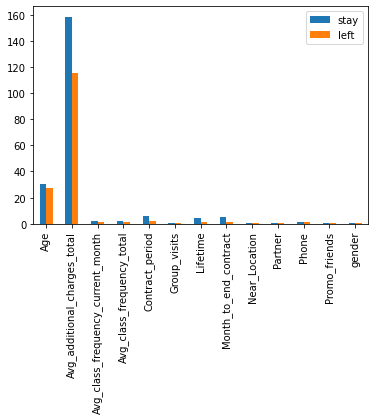

In [8]:
datagr.plot.bar()

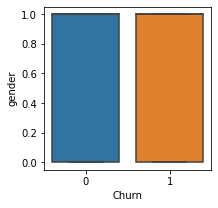

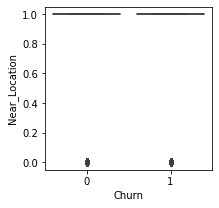

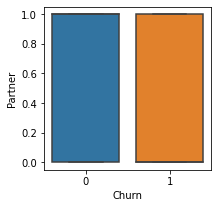

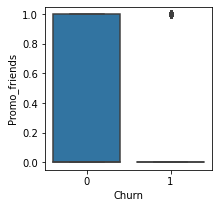

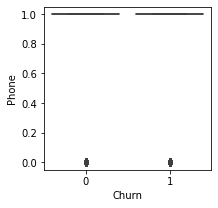

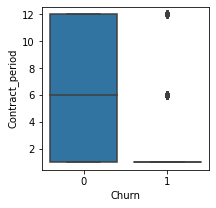

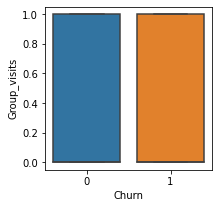

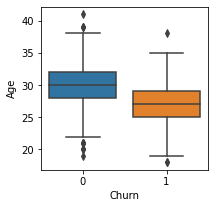

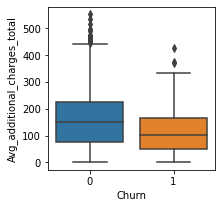

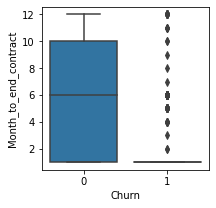

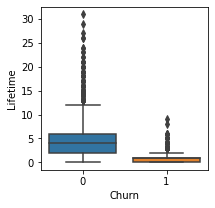

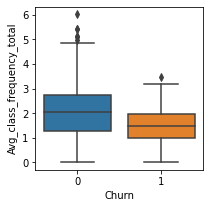

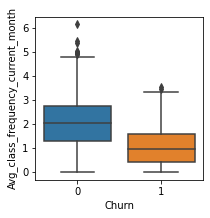

In [9]:
for col in data.drop('Churn', axis=1).columns:
    plt.figure(figsize = (3,3))
    sns.boxplot(y=data[col],x=data['Churn'])
    plt.show()
    

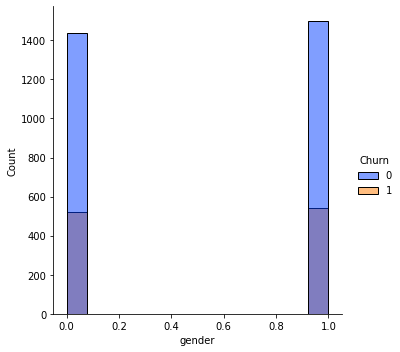

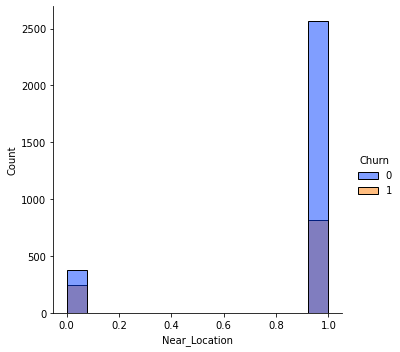

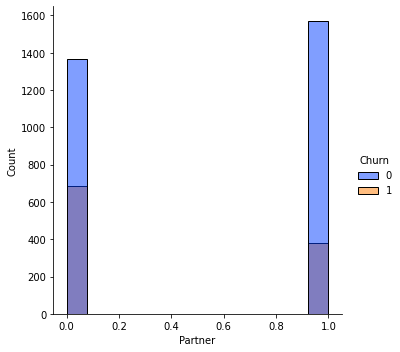

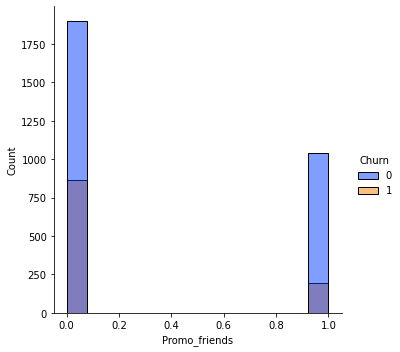

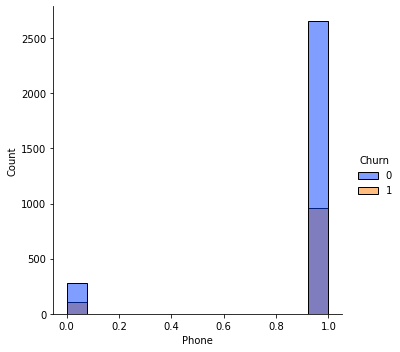

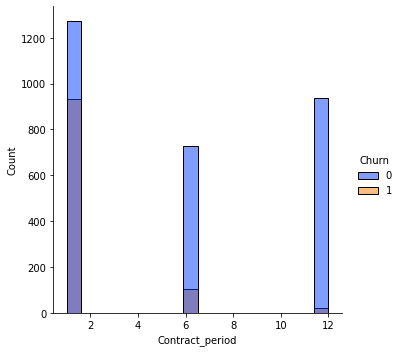

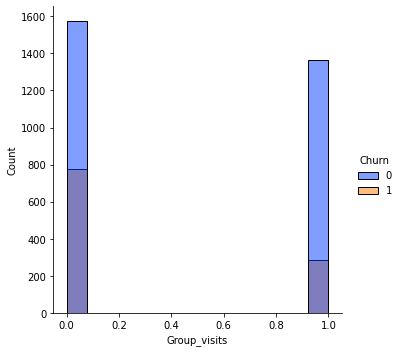

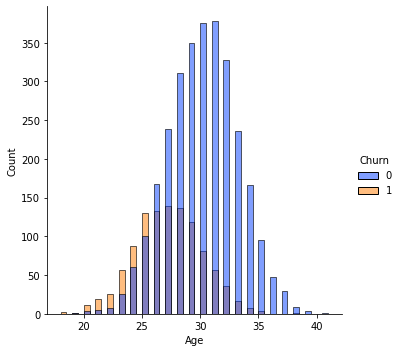

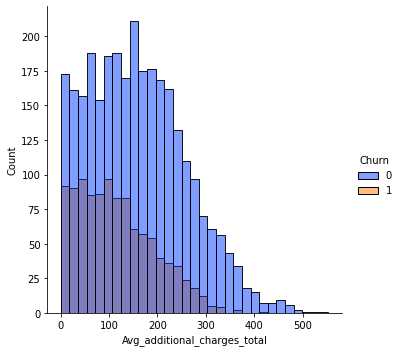

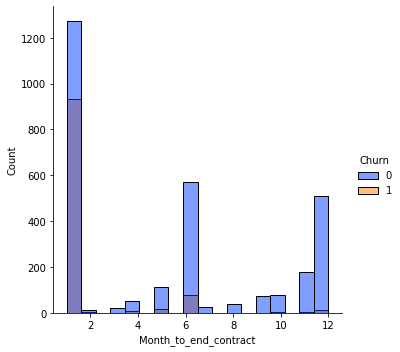

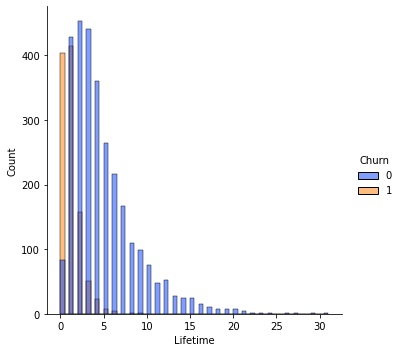

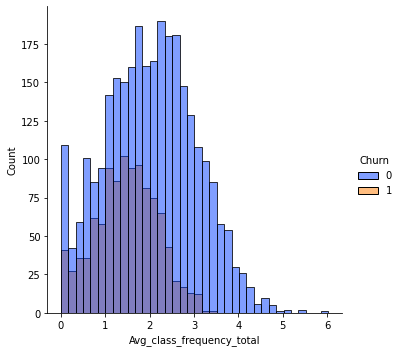

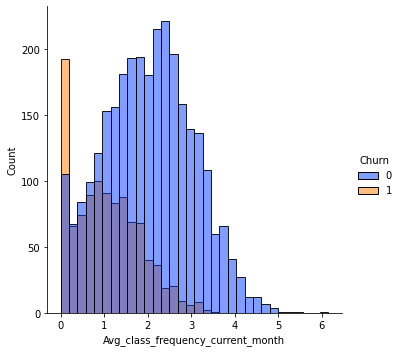

In [10]:
sns.set_palette('bright') 
for col in data.drop('Churn', axis=1).columns:
    sns.displot(data, x=col, hue="Churn")

***Features such as:***<br>
***- Almost no one with a one-year contract leaves the club, and most clients with a one-month contract leave***<br>
***- Most of the clients who were brought by friends and who are partners remain***<br>
***- Most of the clients who do not visit the club in the last month leave***

In [11]:
data.corr()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


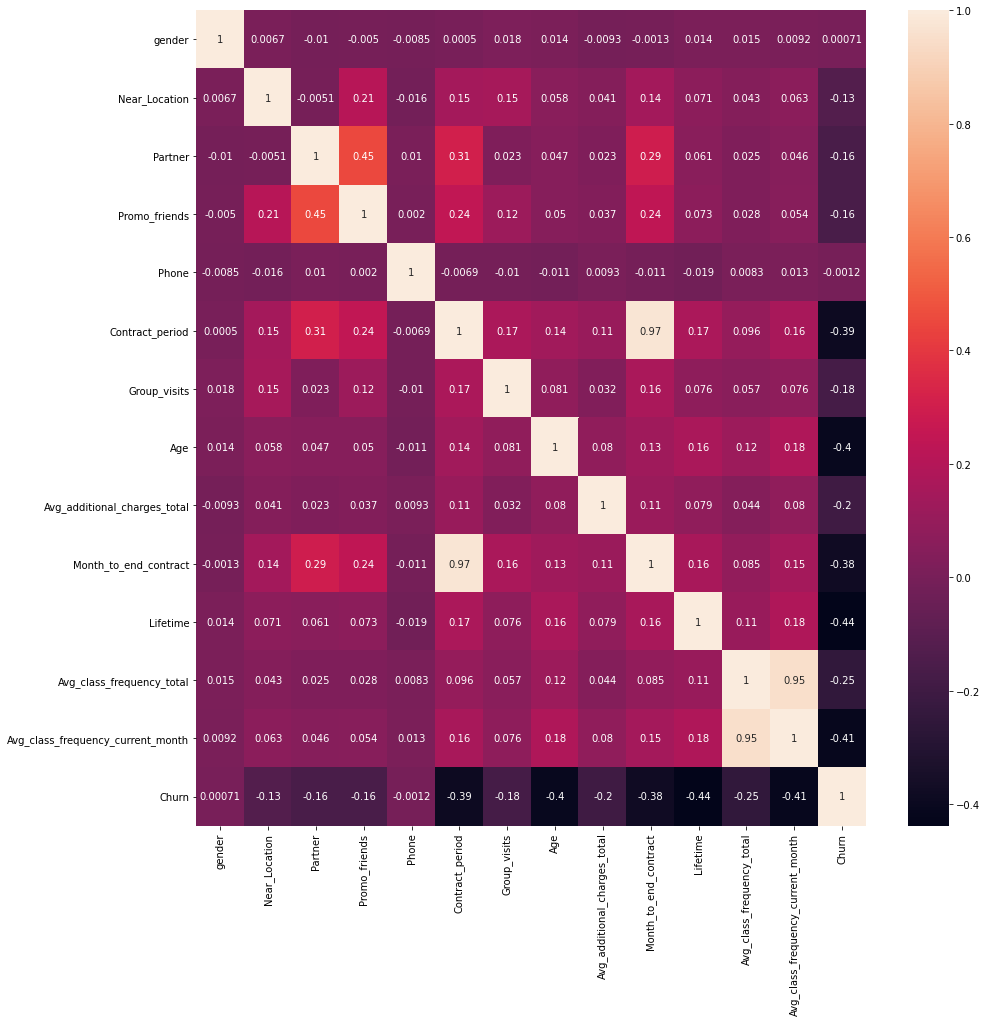

In [12]:
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(data.corr(), annot = True)
ax.set_ylim(14, 0)
plt.show()

***The main conclusion from the correlation matrix is that there is no clear relationship (coefficient close to 1) between churn rates and customer characteristics.<br>
The table contains interdependent characteristics such as Contract Period and Month_to_end_contract (0.97), Avg_class_frequency_total and Avg_class_frequency_current_month (0.95). In further analysis, we can limit ourselves to only one characteristic of two interdependent ones.***

## Building a model to predict user churn

### Let's build a binary classification model for customers where the target feature is the user's leaving next month.

#### Dividing the data into train and validation sets

In [13]:
# divide the data into features (the X matrix) and a target variable (y)
X = data.drop('Churn', axis = 1)
y = data['Churn']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

#### Training the model on the train set with logistic regression and random forest


In [15]:
model=LogisticRegression()
model.fit(X_train, y_train)
probabilities = model.predict_proba(X_test)[:,1]
predictions = model.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Accuracy: 0.92
Precision: 0.87
Recall: 0.81


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
model=RandomForestClassifier(n_estimators = 100, random_state = 0)
model.fit(X_train, y_train)
probabilities = model.predict_proba(X_test)[:,1]
predictions = model.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Accuracy: 0.92
Precision: 0.84
Recall: 0.82


***We see that both models work well. Logistic regression wins slightly in terms of - Precision and Random forest - in terms of recall.***

## Creating user clusters

### Standardize the data:

In [17]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

### Building a matrix of distances based on the standardized feature matrix and plot a dendrogram

In [18]:
linked = linkage(X_sc, method = 'ward') 

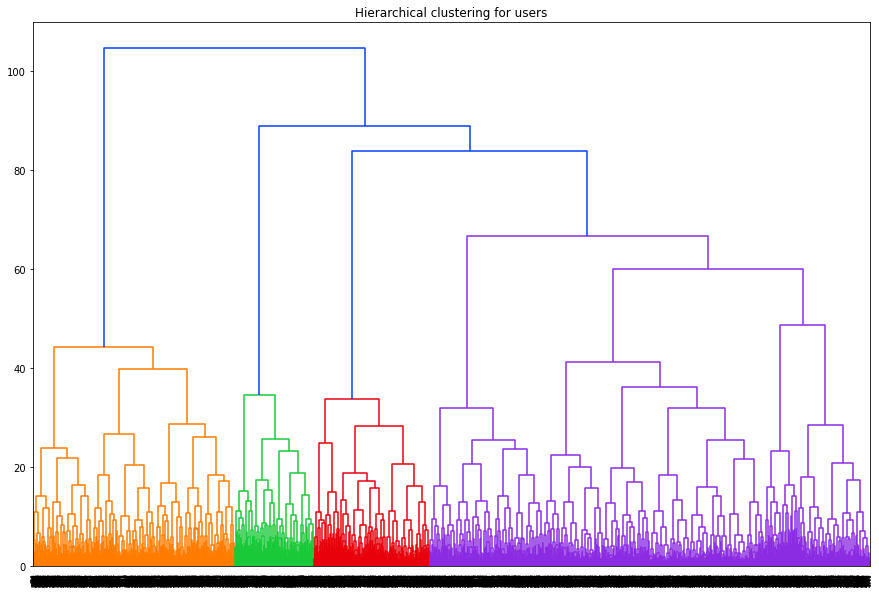

In [19]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for users')
plt.show() 

We can single out 4 clusters.

In [20]:
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(X_sc)

In [21]:
labels

array([1, 0, 3, ..., 0, 0, 1], dtype=int32)

In [22]:
data['cluster'] = labels

### Looking at the mean feature values for clusters

In [23]:
data.groupby(['cluster']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


***We see that:***<br>
***- No one from the cluster(1) left their phone number.***<br>
***- Clients of cluster(0) have contracts for more than 10 months, which expire after more than 9 months. Almost 80% of clients are partners of the club. Also, over 50% of them attend group classes and have a churn rate of only around 3%.***<br>
***- All clients from cluster(2) do not work and do not live near the fitness center, clients in the remaining clusters 86-100% live or work near the club.***<br>
***- Also, less than 10% of clients from the 3rd cluster registered through friends.***

### Ploting distributions of features for the clusters

In [24]:
data.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,1
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,3
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0,4
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0,1
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1,3
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0,3
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0,4


In [25]:
data_clean=data.drop(columns=['gender','Near_Location','Partner','Promo_friends','Phone','Contract_period','Group_visits'])

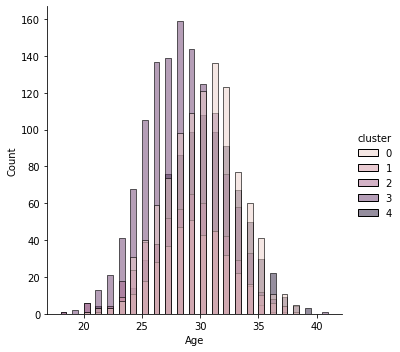

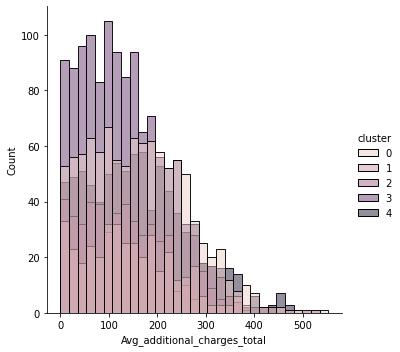

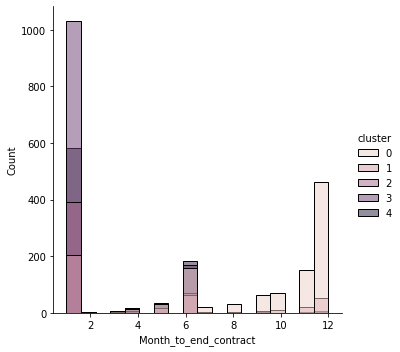

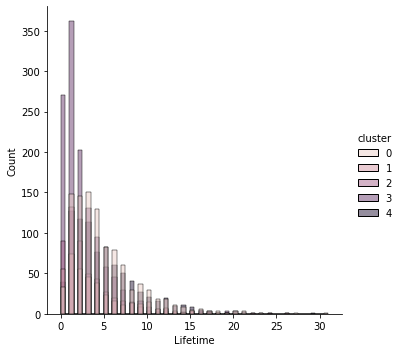

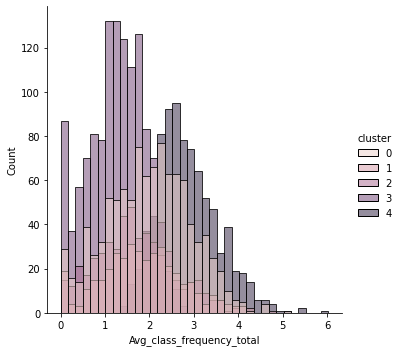

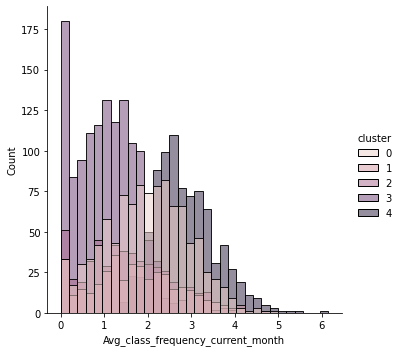

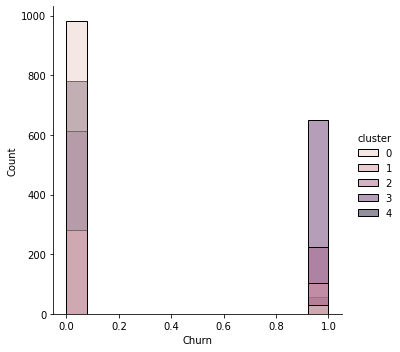

In [26]:
for col in data_clean.drop('cluster', axis=1).columns:
    sns.displot(data, x=col, hue="cluster")
    

### Calculating the churn rate for each cluster

In [27]:
data.groupby(['cluster']).mean()['Churn']

cluster
0    0.027723
1    0.267532
2    0.443564
3    0.514263
4    0.068019
Name: Churn, dtype: float64

***As we saw earlier cluster(0) and cluster(4) have the lowest churn rates - 3% and 7% respectively, cluster(2) and cluster(3) have the highest churn rates - 52% and 44%.***

## Conclusions and basic recommendations on working with customers

1. It is necessary to focus on clients - partners - they are the ones who have the lowest churn rate, the longest contracts and spend more on services than other clients. Accordingly, it makes sense to attract new companies to the partnership.
<br>
2. Enter into long-term contracts, since the outflow of customers with contracts for 1-2 months is the highest.
<br> 
3. Also, clients referred by friends have a low churn rate, so it is necessary to increase the attraction of just such clients.